In [1]:
import os
from random import randint
import math

import json
from tqdm import tqdm
import torch
import torch.nn as nn
import random
import numpy as np
import itertools
import torch.nn.functional as F

import matplotlib
import matplotlib.pyplot as plt

torch.backends.cudnn.benchmark = True
device = 'cuda:0'


/home/jovyan/myconda_envs/open_clip/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", plot_cbar=True, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = None
    if plot_cbar:
        cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
        cbar.ax.tick_params(labelsize=15)

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def plot_heatmap(z, filename=None, plot_cbar=True):
    N = z.shape[0]
    fig, ax = plt.subplots()
    im, cbar = heatmap(z, np.arange(N), np.arange(N), ax=ax, plot_cbar=plot_cbar, cmap="YlGn", vmin=-1.0, vmax=1.0)
    texts = annotate_heatmap(im, valfmt="")#"{x:.4f}")
    fig.tight_layout()
    if filename is not None:
        plt.savefig(f'{filename}.png', format='png', dpi=600, bbox_inches='tight', pad_inches=0.05)
        plt.savefig(f'{filename}.pdf', format='pdf', dpi=600, bbox_inches='tight', pad_inches=0.05)
    plt.close('all')

In [13]:
plot_heatmap(z3_rearranged, filename=os.path.join(f"TEST_for_cbar_plotting"), plot_cbar=True)

## 1) d >=  N - 1
- Theorem 1 - the optimal solution for full-batch forms ETF: report the matrix results by table; N={4, 8, 12, 16, 20}
- Theorem 2 - the optimal solution for NcB forms ETF: report the matrix results showing that the batch size 2 for N={4, 8, 12, 16, 20} forms ETF by checking ui T uj = −1/(N − 1) for all $i\neq j$.
- Theorem 3 - the optimal solution for fewer than NcB doesn't form ETF: report the same as Theorem 2, but with the fixed batch selection.

In [3]:
Ns = [4, 8, 12, 16, 20]
ds = [2 * n for n in Ns]
lr_fulls = [0.1, 0.5]
NUM_STEPS = 10000
plot_output_dir = "output/sim_theorem_plots/d_>=_N_1"
os.makedirs(plot_output_dir, exist_ok=True)

<Figure size 3600x2400 with 0 Axes>

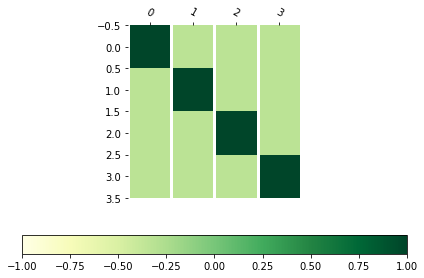

<Figure size 3600x2400 with 0 Axes>

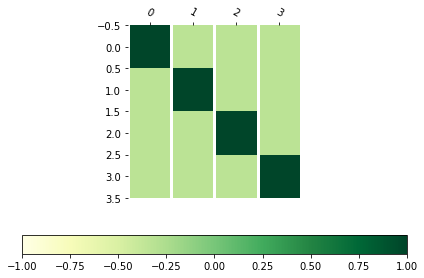

In [22]:
for lr_full in lr_fulls:
    for N, d in zip(Ns, ds):
        output_dir = f"output/sim_theorem_N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}"
        z_full_batch = torch.load(os.path.join(output_dir, "u1@v1.T_full_batch_9999.pt")).detach().cpu().numpy()
        z_NcB_mini_batch = torch.load(os.path.join(output_dir, "u2@v2.T_NcB_mini_batch_9999.pt")).detach().cpu().numpy()
        z_fixed_mini_batch = torch.load(os.path.join(output_dir, "u3@v3.T_fixed_mini_batch_9999.pt")).detach().cpu().numpy()
        plot_heatmap(z_full_batch)
        break
        # plot_heatmap(z_full_batch, filename=os.path.join(plot_output_dir, f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}_u1@v1.T_full_batch_9999"))
        # plot_heatmap(z_NcB_mini_batch, filename=os.path.join(plot_output_dir, f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}_u2@v2.T_NcB_mini_batch_9999"))
        # plot_heatmap(z_fixed_mini_batch, filename=os.path.join(plot_output_dir, f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}_u3@v3.T_fixed_mini_batch_9999"))

## 2) d < N - 1
- Theorem 1 - same as 1) but with different results
- Theorem 2 - same as 1) but with different results
- Theorem 3 - same as 1) but with different results

In [57]:
ds_p = [n // 2 for n in Ns]
plot_output_dir = "output/sim_theorem_plots/d_<_N_1"
os.makedirs(plot_output_dir, exist_ok=True)

In [58]:
for lr_full in lr_fulls:
    for N, d in zip(Ns, ds_p):
        output_dir = f"output/sim_theorem_N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}"
        z_full_batch = torch.load(os.path.join(output_dir, "u1@v1.T_full_batch_9999.pt")).detach().cpu().numpy()
        z_NcB_mini_batch = torch.load(os.path.join(output_dir, "u2@v2.T_NcB_mini_batch_9999.pt")).detach().cpu().numpy()
        z_fixed_mini_batch = torch.load(os.path.join(output_dir, "u3@v3.T_fixed_mini_batch_9999.pt")).detach().cpu().numpy()
        # plot_heatmap(z_full_batch, filename=os.path.join(plot_output_dir, f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}_u1@v1.T_full_batch_9999"))
        # plot_heatmap(z_NcB_mini_batch, filename=os.path.join(plot_output_dir, f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}_u2@v2.T_NcB_mini_batch_9999"))
        # plot_heatmap(z_fixed_mini_batch, filename=os.path.join(plot_output_dir, f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}_u3@v3.T_fixed_mini_batch_9999"))

array([[ 1.00000000e+00,  3.64988819e-06, -3.97600388e-06,
        -9.19680019e-07, -3.42639032e-05,  8.66421124e-06,
        -8.07130073e-06,  3.27155249e-06,  8.54947393e-06,
         8.23986556e-06, -6.66412188e-06, -1.67407143e-05,
        -3.17388003e-06,  5.99570626e-07,  9.34845411e-06,
         2.01852072e-06,  8.98809139e-06,  3.31753690e-05,
        -1.15372777e-05, -1.00000000e+00],
       [ 3.65967344e-06,  9.99999821e-01, -1.89498212e-06,
         2.97416841e-06,  2.21665941e-05, -4.92289189e-07,
         3.42198837e-06, -6.79299819e-06, -2.21204555e-05,
         2.55203850e-06, -4.61499712e-06, -1.63590903e-06,
         1.00465577e-05,  3.44739396e-06, -1.14350250e-05,
        -9.99999940e-01, -9.86948908e-06, -1.65239351e-06,
         1.42378321e-05, -1.77222103e-06],
       [-3.95951201e-06, -1.89005868e-06,  9.99999881e-01,
         2.34598101e-05,  2.17111528e-06,  9.10342806e-07,
        -2.14519196e-06,  3.25598563e-07,  5.85495116e-07,
        -5.46812544e-06, -9.9

In [21]:
batch_selection = ''
N = 8
d = 16
lr_full = 0.5
NUM_STEPS = 10000
num_steps_factor = 2
batch_size_list = [2]
B = 2
step = NUM_STEPS * num_steps_factor - 1
output_dir = f"output/hst_N4,8,12/hst_N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}x{num_steps_factor}_all_Bs{batch_size_list}"
z1 = torch.load(f"{output_dir}/z1_full_batch_{step}.pt")
z1

tensor([[ 1.0000, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429],
        [-0.1429,  1.0000, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429],
        [-0.1429, -0.1429,  1.0000, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429],
        [-0.1429, -0.1429, -0.1429,  1.0000, -0.1429, -0.1429, -0.1429, -0.1429],
        [-0.1429, -0.1429, -0.1429, -0.1429,  1.0000, -0.1429, -0.1429, -0.1429],
        [-0.1429, -0.1429, -0.1429, -0.1429, -0.1429,  1.0000, -0.1429, -0.1429],
        [-0.1429, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429,  1.0000, -0.1429],
        [-0.1429, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429, -0.1429,  1.0000]])

In [23]:
batch_selection = 'f'
N = 8
d = 16
lr_full = 0.5
NUM_STEPS = 10000
num_steps_factor = 2
batch_size_list = [2]
B = 2
step = NUM_STEPS * num_steps_factor - 1
output_dir = f"output/hst_N4,8,12/hst_N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}x{num_steps_factor}_all_Bs{batch_size_list}"
z3 = torch.load(f"{output_dir}/z3_{batch_selection}_mini_batch_B{B}_{step}.pt")
z3

tensor([[ 1.0000, -0.0781,  0.2062,  0.1980, -0.2062,  0.0781, -0.1980, -1.0000],
        [-0.0781,  1.0000,  0.2877,  0.0157, -0.2877, -1.0000, -0.0157,  0.0781],
        [ 0.2062,  0.2877,  1.0000,  0.3862, -1.0000, -0.2877, -0.3862, -0.2062],
        [ 0.1980,  0.0157,  0.3862,  1.0000, -0.3862, -0.0157, -1.0000, -0.1980],
        [-0.2062, -0.2877, -1.0000, -0.3862,  1.0000,  0.2877,  0.3862,  0.2062],
        [ 0.0781, -1.0000, -0.2877, -0.0157,  0.2877,  1.0000,  0.0157, -0.0781],
        [-0.1980, -0.0157, -0.3862, -1.0000,  0.3862,  0.0157,  1.0000,  0.1980],
        [-1.0000,  0.0781, -0.2062, -0.1980,  0.2062, -0.0781,  0.1980,  1.0000]])

In [22]:
batch_selection = 'bg'
N = 8
d = 16
lr_full = 0.5
NUM_STEPS = 10000
num_steps_factor = 2
batch_size_list = [2]
B = 2
step = NUM_STEPS * num_steps_factor - 1
output_dir = f"output/hst_N4,8,12/hst_N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}x{num_steps_factor}_all_Bs{batch_size_list}"
z3 = torch.load(f"{output_dir}/z3_{batch_selection}_mini_batch_B{B}_{step}.pt")
z3

tensor([[ 1.0000, -0.1550, -0.1338, -0.1896, -0.1718, -0.1146, -0.1399, -0.0954],
        [-0.1550,  1.0000, -0.1467, -0.1201, -0.1642, -0.1314, -0.1472, -0.1350],
        [-0.1338, -0.1467,  1.0000, -0.1577, -0.1255, -0.1456, -0.1217, -0.1690],
        [-0.1896, -0.1201, -0.1577,  1.0000, -0.1432, -0.1236, -0.1262, -0.1397],
        [-0.1718, -0.1642, -0.1255, -0.1432,  1.0000, -0.0939, -0.1164, -0.1852],
        [-0.1146, -0.1314, -0.1456, -0.1236, -0.0939,  1.0000, -0.2320, -0.1590],
        [-0.1399, -0.1472, -0.1217, -0.1262, -0.1164, -0.2320,  1.0000, -0.1168],
        [-0.0954, -0.1350, -0.1690, -0.1397, -0.1852, -0.1590, -0.1168,  1.0000]])

In [8]:
z3_rearranged = torch.tensor([
    [z3[0][0], z3[0][2], z3[0][3], z3[0][1]],
    [z3[1][3], z3[1][1], z3[1][0], z3[1][2]],
    [z3[2][1], z3[2][3], z3[2][2], z3[2][0]],
    [z3[3][2], z3[3][0], z3[3][1], z3[3][3]],
])
z3_rearranged

tensor([[ 1.0000,  0.0664, -0.0664, -1.0000],
        [ 0.0664,  1.0000, -1.0000, -0.0664],
        [-0.0664, -1.0000,  1.0000,  0.0664],
        [-1.0000, -0.0664,  0.0664,  1.0000]])

In [5]:
plot_heatmap(z3_rearranged, filename=os.path.join(f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS*num_steps_factor}_z3_fixed_mini_batch_B{B}_{batch_selection}_w_cbar"), plot_cbar=True)
plot_heatmap(z3_rearranged, filename=os.path.join(f"N{N}_d{d}_lr{lr_full}_s{NUM_STEPS*num_steps_factor}_z3_fixed_mini_batch_B{B}_{batch_selection}_wo_cbar"), plot_cbar=False)

In [ ]:
tensor([[ 1.0000,  0.0601, -0.0601, -1.0000],
        [ 0.0601,  1.0000, -1.0000, -0.0601],
        [-0.0601, -1.0000,  1.0000,  0.0601],
        [-1.0000, -0.0601,  0.0601,  1.0000]])

In [30]:
batch_selection = 'bg'
N = 4
d = 2
lr_full = 0.5
NUM_STEPS = 10000
num_steps_factor = 2
batch_size_list = [2]
B = 2
step = NUM_STEPS * num_steps_factor - 1
output_dir = f"output/hst_N4,8,12/hst_N{N}_d{d}_lr{lr_full}_s{NUM_STEPS}x{num_steps_factor}_all_Bs{batch_size_list}"
z3 = torch.load(f"{output_dir}/z3_{batch_selection}_mini_batch_B{B}_{step}.pt")
z3

tensor([[ 1.0000,  0.0601, -0.0601, -1.0000],
        [ 0.0601,  1.0000, -1.0000, -0.0601],
        [-0.0601, -1.0000,  1.0000,  0.0601],
        [-1.0000, -0.0601,  0.0601,  1.0000]])

In [2]:
torch.load("/home/jovyan/open_clip/src/utils/output/se_exps_N4,8,12/se_exp2_sgd_N12_d6_lr0.1_s10000x1_all_Bs[2]/z1_full_batch_9999.pt")

tensor([[ 0.6684, -0.3566, -0.8485, -0.4413,  0.1195,  0.2812, -0.8315,  0.1319,
          0.0434,  0.3283, -0.1800, -0.2479],
        [ 0.6809,  0.7381,  0.0643,  0.2847, -0.6372, -0.3988, -0.2007, -0.2318,
         -0.7623,  0.4882,  0.0931,  0.8020],
        [ 0.0676,  0.3381,  0.3571,  0.1905, -0.7282, -0.5247,  0.4837, -0.0605,
         -0.5115, -0.4004,  0.1362,  0.2334],
        [ 0.2445,  0.3681,  0.1964,  0.6349, -0.1707,  0.4776, -0.2377, -0.7906,
         -0.3061,  0.3533, -0.8487, -0.1477],
        [ 0.2172, -0.0132, -0.2500,  0.0200,  0.5648,  0.5074, -0.4858, -0.0534,
          0.3172,  0.6322, -0.1722,  0.0482],
        [-0.1827, -0.1731,  0.1614,  0.2890,  0.0908,  0.4956,  0.1265, -0.3707,
          0.1914, -0.2267, -0.6359, -0.6312],
        [-0.7995,  0.0097,  0.6971,  0.2786,  0.5709,  0.1959,  0.7664,  0.1195,
          0.6202, -0.1973,  0.1840, -0.0317],
        [ 0.1790,  0.2608,  0.1667, -0.1294, -0.8034, -0.8388,  0.4751,  0.3077,
         -0.5359, -0.4712,  0.